<h2>Deep Facial Recognition with Siamese Network</h2>

<h3>1.1 Project Definition</h3>

<h3>1.2 Import Dependencies</h3>

In [1]:
# import dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# import tensorflow dependencies
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

2025-03-02 17:41:41.982168: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 17:41:41.986213: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 17:41:41.998919: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-02 17:41:42.020025: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-02 17:41:42.026197: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 17:41:42.040998: I tensorflow/core/platform/cpu_feature_gu

<h3>1.3 Set GPU Growth</h3>


In [3]:
# Avoid out of memory errors by setting GPU memory consumption Growth
# only set on GPU machine
#gpus = tf.config.experimental.list_physical_devices("GPU")
#for gpu in gpus:
    #tf.config.experimental.set_memory_growth(gpu, True)

<h3>1.4 Create Folder Structures</h3>


In [4]:
# Setup paths
POS_PATH = os.path.join("data", "positive")
NEG_PATH = os.path.join("data", "negative")
ANC_PATH = os.path.join("data", "anchor")

In [5]:
# Make directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [Errno 17] File exists: 'data/positive'

<h3>2.1 Untar Labelled Faces in the Wild Dataset</h3>

In [ ]:
# Uncompress Tar GZ labelled Faces in the wild dataset
!tar -xf lfw.tgz

In [ ]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir("lfw"):
    for file in os.listdir(os.path.join("lfw", directory)):
        EX_PATH = os.path.join("lfw", directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

<h3>2.2 Collect Positive and Anchor Classes</h3>

In [17]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    # Cut down frame to 250*250 px
    frame = frame[120:120+250, 200:200+250, :]
    # Collect anchors

    # Collect positives
    
    # show image back to screen
    cv2.imshow("Image Collection", frame)
    # breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord("q"):
        break
# Release the webcam
cap.release() 
# Close the image 
cv2.destroyAllWindows()

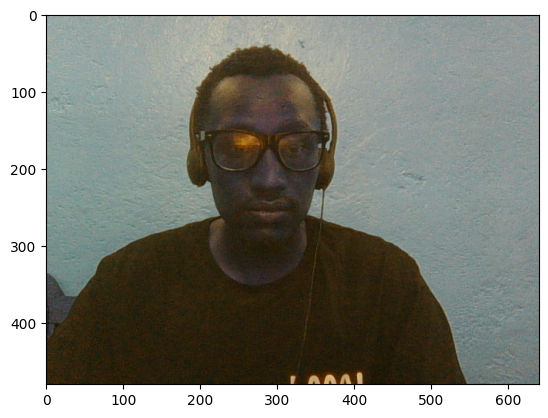

In [10]:
plt.imshow(frame)

In [11]:
frame.shape

(480, 640, 3)

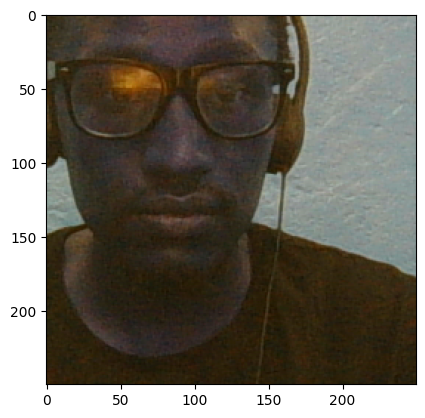

In [16]:
plt.imshow(frame[120:120+250, 200:200+250, :])